<a href="https://colab.research.google.com/github/thaitruong018/e_commerce_analysis/blob/main/2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [25]:
# path to data
path = '/content/gdrive/MyDrive/brazilian_ecommerce'

# Data

In [26]:
# read data
data = pd.read_csv(os.path.join(path,'df_order_items_products_customers.csv'))

In [27]:
# first 5 rows
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,f293394c72c9b5fafd7023301fc21fc2,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,moveis_decoracao,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 16:35:46,39.99,11.80,moveis_decoracao,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,c1488892604e4ba5cff5b4eb4d595400,2,1554a68530182680ad5c8b042c3ab563,2017-01-13 00:37:18,38.50,15.56,moveis_decoracao,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ


In [28]:
# overal info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102425 non-null  object 
 5   order_delivered_carrier_date   102425 non-null  object 
 6   order_delivered_customer_date  102425 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   quantity                       102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

In [29]:
# statistical info
data.describe()

,quantity,price,freight_value,customer_zip_code_prefix
count,102425.000000,102425.000000,102425.000000,102425.000000
mean,1.099829,124.422006,20.111152,35102.027669
std,0.456926,188.926084,15.884700,29793.034360
min,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,40.000000,13.140000,11320.000000
50%,1.000000,78.800000,16.320000,24360.000000
75%,1.000000,139.000000,21.220000,58790.000000
max,20.000000,6735.000000,409.680000,99990.000000


# Analysis

## Orders

In [30]:
# the highest value of an order
data.groupby('order_id').sum()['price'].sort_values(ascending=False).reset_index().head(5)

,order_id,price
0,0812eb902a67711a1cb742b3cdaa65ae,6735.0
1,fefacc66af859508bf1a7934eab1e97f,6729.0
2,f5136e38d1a14a4dbd87dff67da82701,6499.0
3,a96610ab360d42a2e5335a3998b4718a,4799.0
4,199af31afc78c699f0dbf71fb178d4d4,4690.0


In [31]:
# the lowest value of an order
data.groupby('order_id').sum()['price'].sort_values(ascending=True).reset_index().head(5)

,order_id,price
0,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85
1,6e864b3f0ec71031117ad4cf46b7f2a1,0.85
2,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20
3,e8bbc1d69fee39eee4c72cb5c969e39d,2.29
4,38bcb524e1c38c2c1b60600a80fc8999,2.90


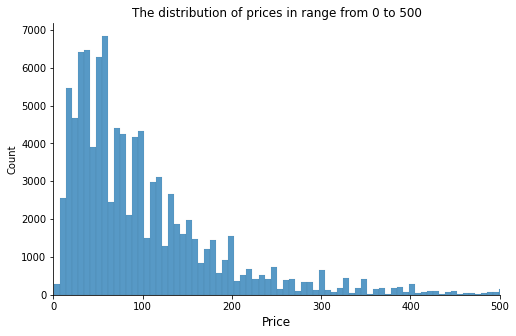

In [33]:
# distribution of prices
plt.figure(figsize = (8, 5))
sns.histplot(data= data, x='price',  bins = 1000)
plt.title('The distribution of prices in range from 0 to 500')
plt.xlim([0,500])
plt.xlabel('Price', fontsize = 12)
sns.despine()
plt.show()

* We can see that the majority of the prices is in the lower range of up to 100

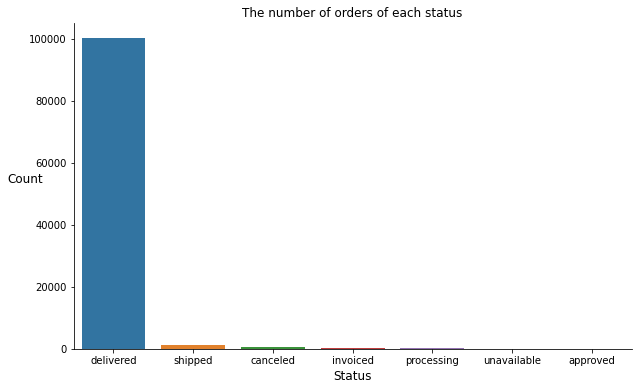

In [34]:
# plot order status
bar_plot_data = data['order_status'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = bar_plot_data, x='index', y='order_status')
plt.xlabel('Status', fontsize =12)
plt.ylabel('Count', fontsize =12,rotation=0)
plt.title('The number of orders of each status')
sns.despine()
plt.show()

* The big majority of orders were placed at delivered status

In [35]:
# redefine dataset
data = data[data['order_status']=='delivered']

In [36]:
# convert datatype 
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
# extract attributes
data['order_purchase_year'] = data['order_purchase_timestamp'].dt.year
data['order_purchase_month'] = data['order_purchase_timestamp'].dt.month
data['order_purchase_date'] = data['order_purchase_timestamp'].dt.date
data['order_purchase_year_month'] = data['order_purchase_timestamp'].dt.to_period('M')
data['order_purchase_month_name'] = data['order_purchase_timestamp'].dt.month_name()
data['order_purchase_day'] = data['order_purchase_timestamp'].dt.day
data['order_purchase_dayofweek'] = data['order_purchase_timestamp'].dt.dayofweek
data['order_purchase_dayofweek_name'] = data['order_purchase_timestamp'].dt.day_name()

data_hour = pd.read_csv(os.path.join(path,'olist_orders_dataset.csv'))
data_hour = data_hour[['order_id','order_purchase_timestamp']].copy()
data_hour['order_purchase_timestamp'] = pd.to_datetime(data_hour['order_purchase_timestamp'])
data_hour['order_purchase_hour'] = data_hour['order_purchase_timestamp'].dt.hour
data_hour = data_hour[['order_id','order_purchase_hour']].copy()
data = pd.merge(data, data_hour, how='inner', on='order_id')
# add extra column based on 'order_purchase_hour' column
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
data['order_purchase_time_day'] = pd.cut(data['order_purchase_hour'], hours_bins, labels = hours_labels)

In [37]:
# quick look at dataset
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_date,order_purchase_year_month,order_purchase_month_name,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,moveis_decoracao,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS,2016,10,2016-10-04,2016-10,October,4,1,Tuesday,14,Afternoon
1,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 16:35:46,39.99,11.80,moveis_decoracao,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG,2016,10,2016-10-10,2016-10,October,10,0,Monday,15,Afternoon
2,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,c1488892604e4ba5cff5b4eb4d595400,2,1554a68530182680ad5c8b042c3ab563,2017-01-13 00:37:18,38.50,15.56,moveis_decoracao,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ,2017,1,2017-01-09,2017-01,January,9,0,Monday,0,Dawn
3,03b218d39c422c250f389120c531b61f,db857a86c685a6a3a02a705961ec1ff1,delivered,2017-01-14,2017-01-14,2017-01-16,2017-01-18,2017-03-01,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2017-01-18 14:20:01,38.50,11.74,moveis_decoracao,c83d504c46170342ddbc93c762e0e4ec,35171,coronel fabriciano,MG,2017,1,2017-01-14,2017-01,January,14,5,Saturday,14,Afternoon
4,9b2e5e7107f9b0d28873782803e01ecd,f528cd2e64c47c4d65c1355294c43323,delivered,2017-01-17,2017-01-17,2017-01-18,2017-01-26,2017-03-06,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2017-01-21 20:20:10,38.50,15.56,moveis_decoracao,6228bfcc46762217dfb30909688d80be,13250,itatiba,SP,2017,1,2017-01-17,2017-01,January,17,1,Tuesday,20,Night


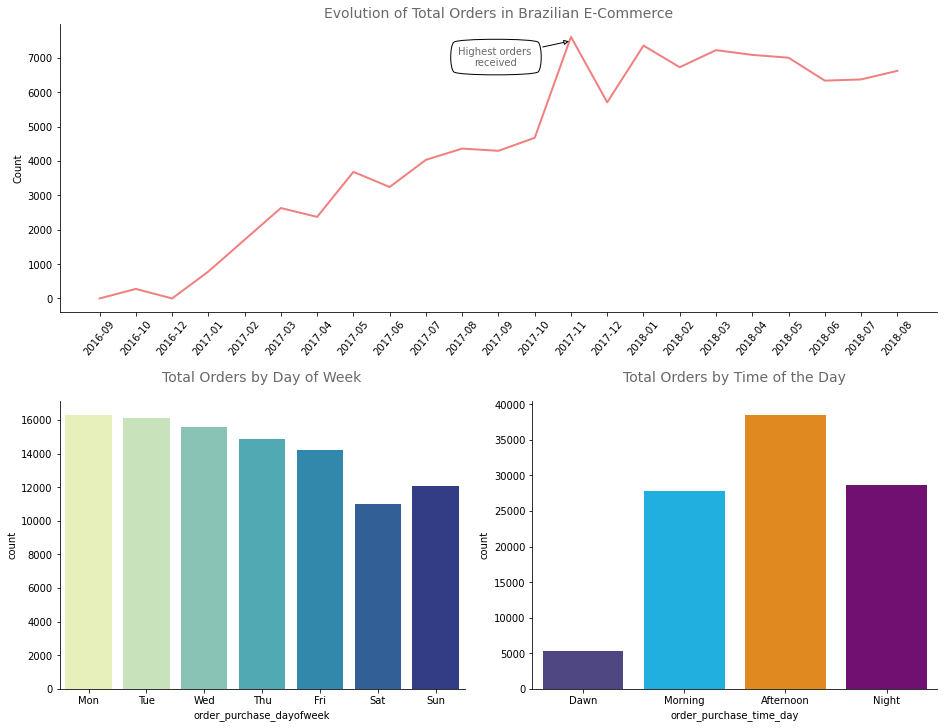

In [38]:
# plot three graphs 
# define figure
fig = plt.figure(constrained_layout=True, figsize=(13, 10))
# define axis
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
# plot lineplot - Evolution of e-commerce orders along time 
data['order_purchase_year_month'] = data['order_purchase_year_month'].astype('string')
sns.lineplot(data=data['order_purchase_year_month'].value_counts().sort_index(), ax=ax1,
             color='lightcoral', linewidth=2)

ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25),   # add annotate
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),  #fc=facecolor
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(50)

ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')
ax1.set_ylabel('Count')
# Barchart - Total of orders by day of week
sns.countplot(data=data, x='order_purchase_dayofweek', palette='YlGnBu', ax=ax2)
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
sns.countplot(data=data, x='order_purchase_time_day', palette= day_color_list, ax=ax3)

ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.show()

* Looking at the charts above we can conclude that there was an upward trend in the number of orders along the time. In other words, customers are buying more than before. In addition, the number of orders was highest in Nov 2017, over 7000 due to Black Friday
* Mondays and Tuesdays were the busiest days of week with over 16000 orders.  
* An interesting point is that customers tend to buy more in the afternoons

In [39]:
# calculate the frequency of orders over a day
day_hour = data.groupby(['order_purchase_dayofweek_name','order_purchase_hour']).count()['order_id'].\
                        reset_index().rename(columns={'order_id':'frequency'})
day_hour['order_purchase_dayofweek_name'] = pd.Categorical(day_hour['order_purchase_dayofweek_name'],
                                            categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] ,
                                             ordered= True)
day_hour = pd.pivot_table(data= day_hour, values='frequency' , index = 'order_purchase_dayofweek_name', columns='order_purchase_hour')
day_hour

order_purchase_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_purchase_dayofweek_name,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,270,143,78,41,27,27,31,105,209,361,536,727,675,726,686,723,715,805,915,919,976,889,897,623
Monday,331,137,67,35,21,23,68,165,491,776,1041,1080,975,1036,1101,1102,1097,1006,927,961,1029,1115,1000,727
Tuesday,308,158,86,31,28,25,71,223,524,877,969,1053,903,1064,1137,1045,1109,992,893,924,969,1035,980,710
Wednesday,397,177,85,33,34,24,93,215,508,824,1035,1060,929,1016,1068,988,1044,977,845,849,909,963,880,622
Thursday,364,172,75,39,38,29,83,215,513,760,986,962,974,996,992,940,1083,910,786,824,851,853,869,548
Friday,429,214,70,47,40,36,92,210,503,786,966,995,862,1013,978,980,992,822,730,786,744,725,698,526
Saturday,317,175,67,43,26,24,60,103,252,436,647,717,692,712,685,729,694,709,724,758,739,679,562,436


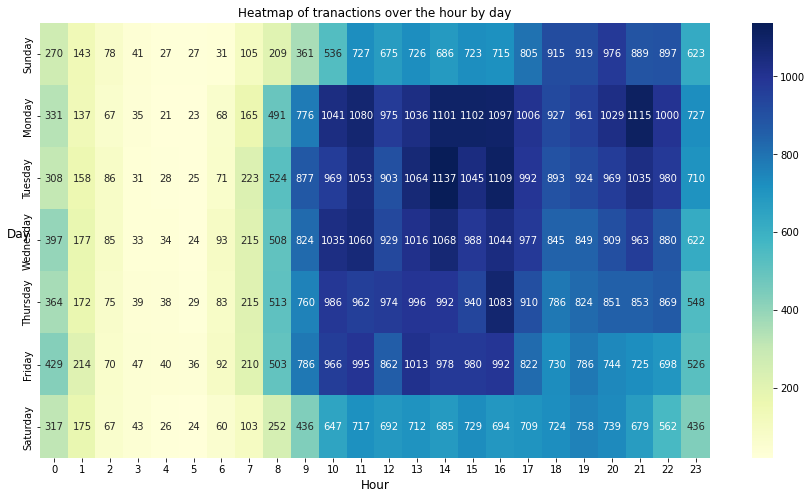

In [40]:
# plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(day_hour,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Day", fontsize= 12,rotation =0)
plt.title("Heatmap of tranactions over the hour by day",size=12)
plt.show()

* Looking at the heatmap above, we can see that there is a difference in the frequency between weekdays and weekends. The customers are more likely to order during weekdays, from 9 AM onwards. On the other hand, on weekends, particularly on Sundays, the range of peak hour was quite narrow, from 18 PM onwards



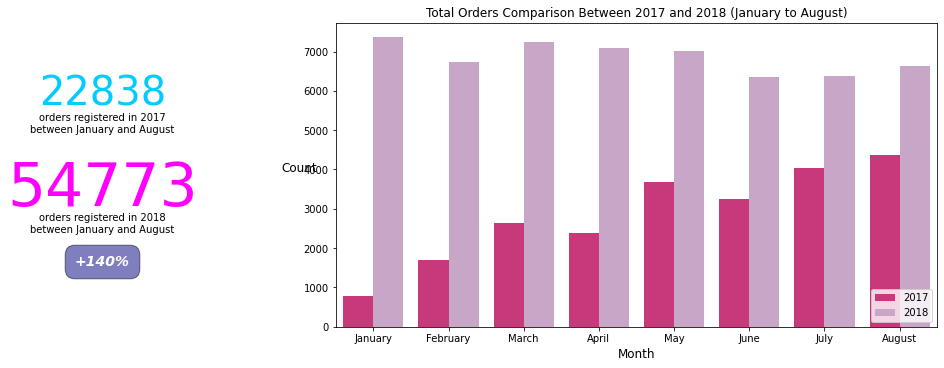

In [41]:
# creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))
# define axis
gs = gridspec.GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
# Annotation - Grown on e-commerce orders between 2017 and 2018
orders_compare = data[(data['order_purchase_month'] <= 8) & (data['order_purchase_year'].isin(['2017','2018']))]
year_orders = orders_compare['order_purchase_year'].value_counts()
growth = int(round(100*(year_orders[2018] - year_orders[2017])/year_orders[2017],0))

ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='#00CCFF', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='magenta', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')

signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', fontstyle='italic', fontweight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
orders_compare = data[(data['order_purchase_month'] <= 8) & (data['order_purchase_year'].isin(['2017','2018']))]
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
sns.countplot(data= orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, palette='PuRd_r')

ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12)
ax2.set_xticklabels(month_label)

ax2.legend(loc='lower right')
ax2.set_xlabel('Month', fontsize =12)
ax2.set_ylabel('Count', fontsize =12, rotation = 0)

plt.show()

* There was a significant increase in the number of orders over 2-year period between 2017 and 2018. In particular, the number of orders in the first 8 months of the year in 2018 was 1.4 times higher than that in 2017.  
* The total orders in 2017 increased steadily while the total orders in 2018 fluctuated slightly

## Products

In [42]:
# read data
df_product = pd.read_csv(os.path.join(path,'olist_products_dataset.csv'))
df_prod_name = pd.read_csv(os.path.join(path,'product_category_name_translation.csv'))
df_product = pd.merge(df_product, df_prod_name,how='inner', on='product_category_name')
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


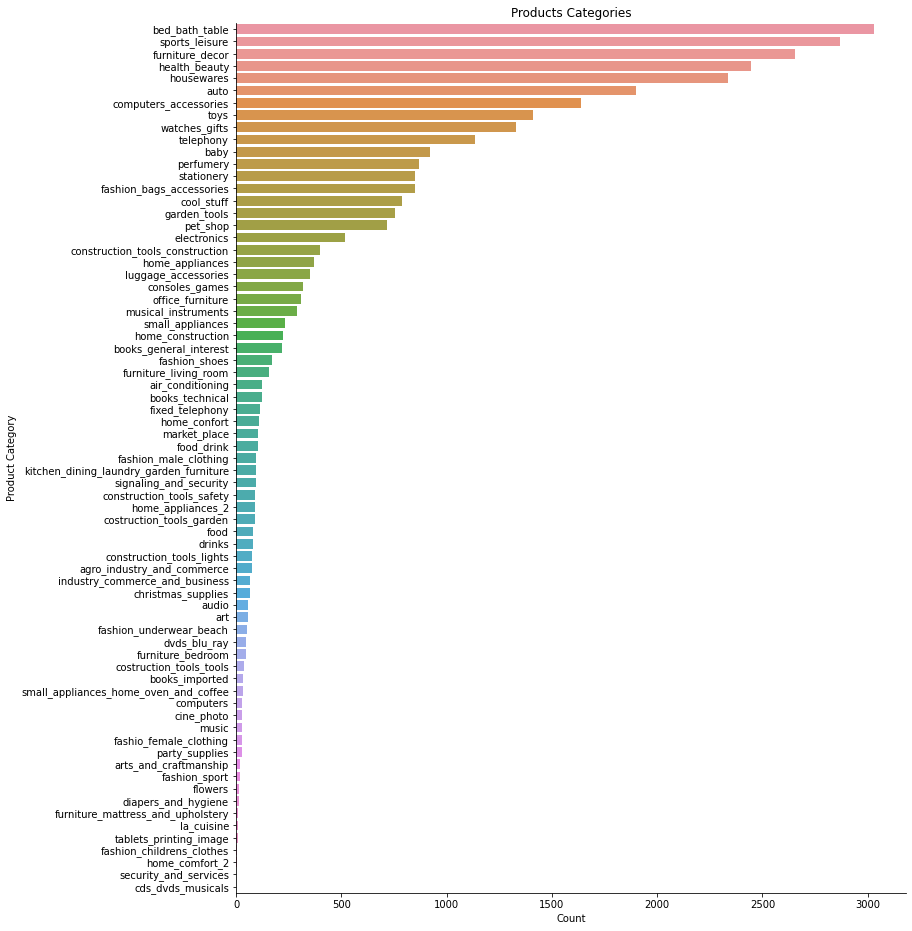

In [44]:
# plot data
plt.figure(figsize=(12,16))
sns.countplot(data= df_product, y='product_category_name_english', 
              order=df_product['product_category_name_english'].value_counts().index)
plt.title('Products Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')
sns.despine()
plt.show()

* It can be clearly seen that the most popular product is bed bath table

## Customers

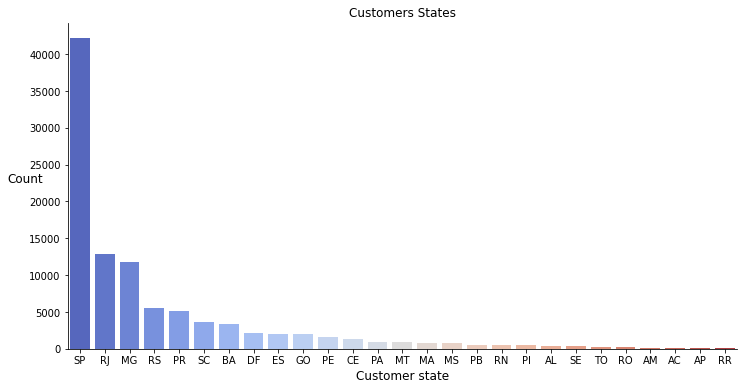

In [45]:
# plot customer dataset
plt.figure(figsize=(12,6))
sns.countplot(x=data['customer_state'], palette='coolwarm', order=data['customer_state'].value_counts().index)
plt.title('Customers States')
plt.xlabel('Customer state', fontsize =12)
plt.ylabel('Count', fontsize =12, rotation = 0)
sns.despine()
plt.show()

* The vast majority of customers lived in Sao Paulo which is located in Southeast region in Brazil, a vibrant financial center, with numerous cultural institutions and a rich architectural tradition 

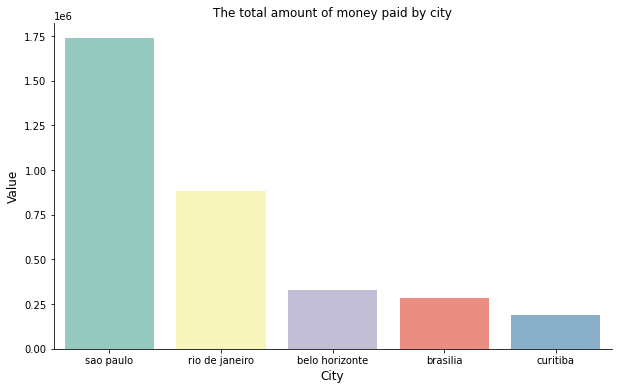

In [50]:
# plot data
plot_data =data.groupby(['customer_city']).sum()['price'].sort_values( ascending=False).reset_index().head(5)
plt.figure(figsize=(10,6))
sns.barplot(data= plot_data, x='customer_city', y= 'price',palette="Set3")
plt.title('The total amount of money paid by city', fontsize= 12)
plt.xlabel('City', fontsize =12)
plt.ylabel('Value', fontsize =12)
sns.despine()
plt.show()

Among 5 cities, Sao paulo was the city where the customers paid the most with over 1.75 million Real Brazil

## Payments

In [51]:
# read payment dataset
df_payment = pd.read_csv(os.path.join(path,'olist_order_payments_dataset.csv'))
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
# check outlier
df_payment['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [53]:
# remove not_defined type
df_payment = df_payment[df_payment['payment_type']!='not_defined']

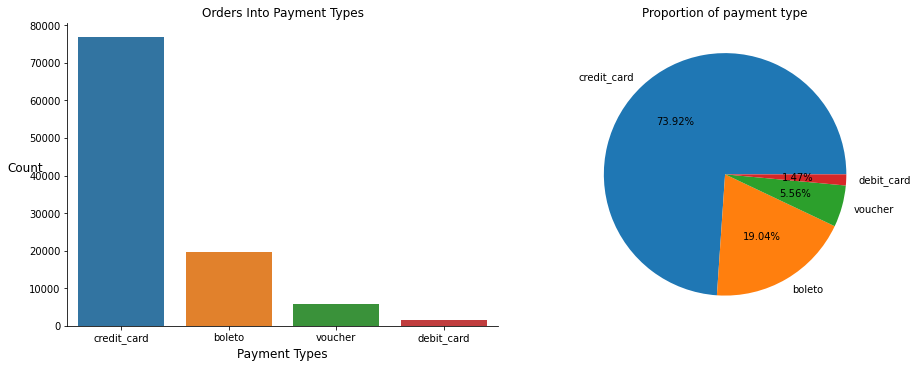

In [54]:
# plot charts
# define figure
fig = plt.figure(constrained_layout=True, figsize=(13,5))
# define axis
gs = gridspec.GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
# bar plot
sns.countplot(data= df_payment, x='payment_type', ax = ax1)
ax1.set_title('Orders Into Payment Types', size=12)
ax1.set_ylabel('Count', fontsize =12, rotation = 0)
ax1.set_xlabel('Payment Types', fontsize =12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# pie chart
df_payment['payment_type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax =ax2)
ax2.set_title('Proportion of payment type')
ax2.set_ylabel('')
plt.show()

* A large number of customers use credit card as their prefered mode of payment followed by boleto  
* Boleto (Boleto Bancário) is a popular Brazilian cash_based payment method with 15% market share. It is the only payment method available for the 35% of Brazilian shoppers who do not have a bank account. Some benefits: Lower risk of fraud, no credit limits, settlement within 3-4 days

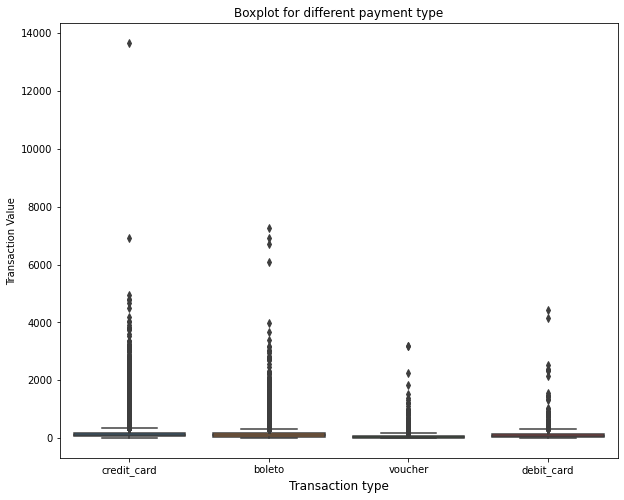

In [55]:
# box plot
plt.figure(figsize=(10,8))
sns.boxplot(data= df_payment, x='payment_type',y='payment_value')
plt.title("Boxplot for different payment type")
plt.xlabel("Transaction type", fontsize =12)
plt.ylabel("Transaction Value")
plt.show()

* For transaction of higher values, customers tend to pay by credit card followed by boleto and debit card